In [5]:
import numpy as np
import numpy.ma as ma
import os
from scipy import stats
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from mangadap.config import defaults
from beta_corr import CubeData

plt.rcParams['figure.figsize'] = (10,6)
plt.rc('axes', labelsize = 25)
plt.rc('axes', titlesize = 18)
#plt.rc('axes', titleweight = 'bold')
plt.rc('axes', lw = 2)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.minor.size'] = 8

# Applying the Correlation Correction 

## 1. Initialize a cube object using the test cube information

In [15]:
# test cube info
galname='test_cube'
bin_key='SQUARE2.0'
plate='100000'
ifu='1'

cube = CubeData(galname=galname,bin_key=bin_key,plate=plate,ifu=ifu)
# get the beta values in each wavelength channel
cube.get_beta()

## 2. View output spectra data for a specific wavelength channel and bin ID
### 2.a plot flux, model and error along with correlation correction plot

- If the spectrum has no masked pixels, an INFO message will be displayed

INFO:root:No masked pixels!


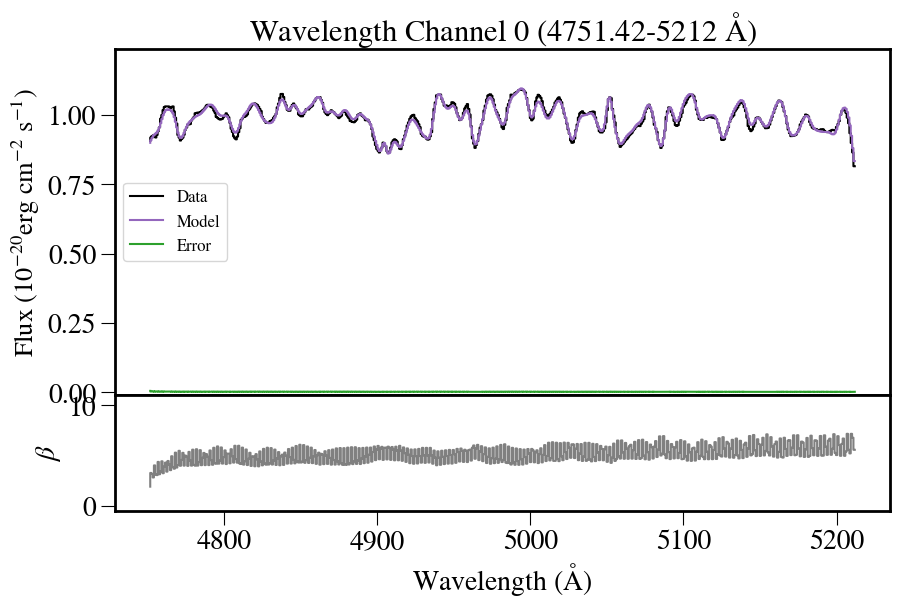

In [16]:
# wavelength channels range is 0-9
cube.mk_residual_plot(wv_channel=0,bin_id=0)

### 2.b Spectra with masked pixels will display a before and after beta plot

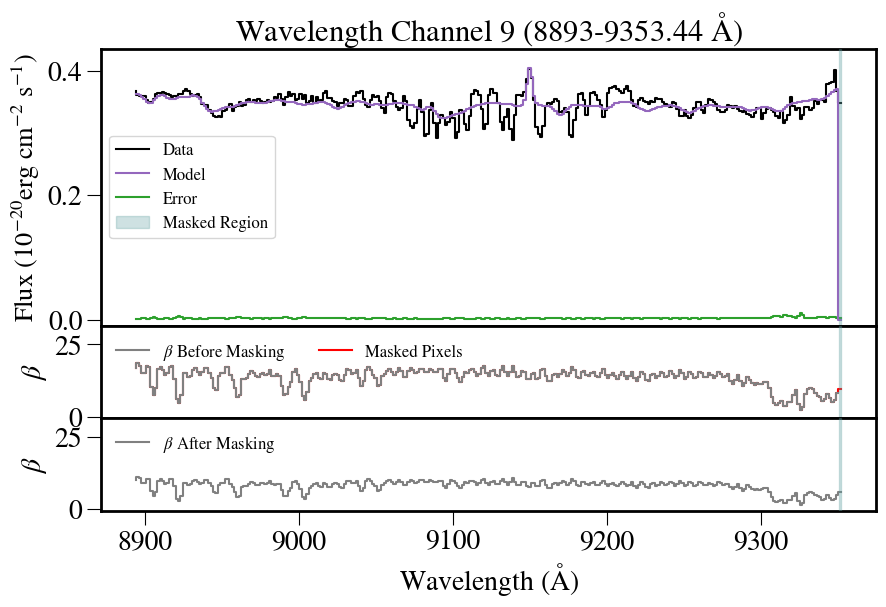

In [17]:
cube.mk_residual_plot(wv_channel=9,bin_id=15)

### 2.c Zoom in on the masked region using the zoom option

- Zoom input must be a list with two wavelengh values

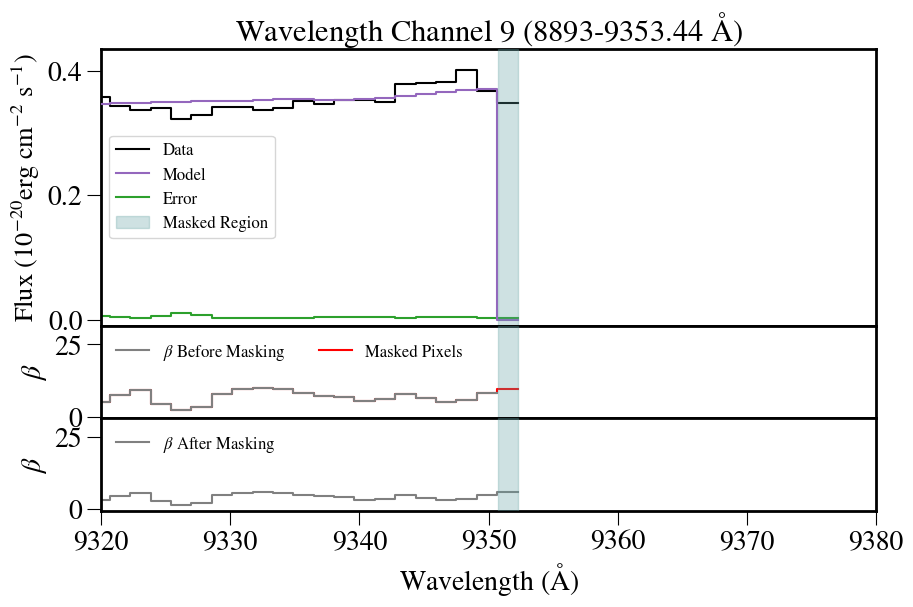

In [18]:
cube.mk_residual_plot(wv_channel=9,bin_id=15,zoom=[9320,9380])

## 3. View Histogram plots for each wavelength channel

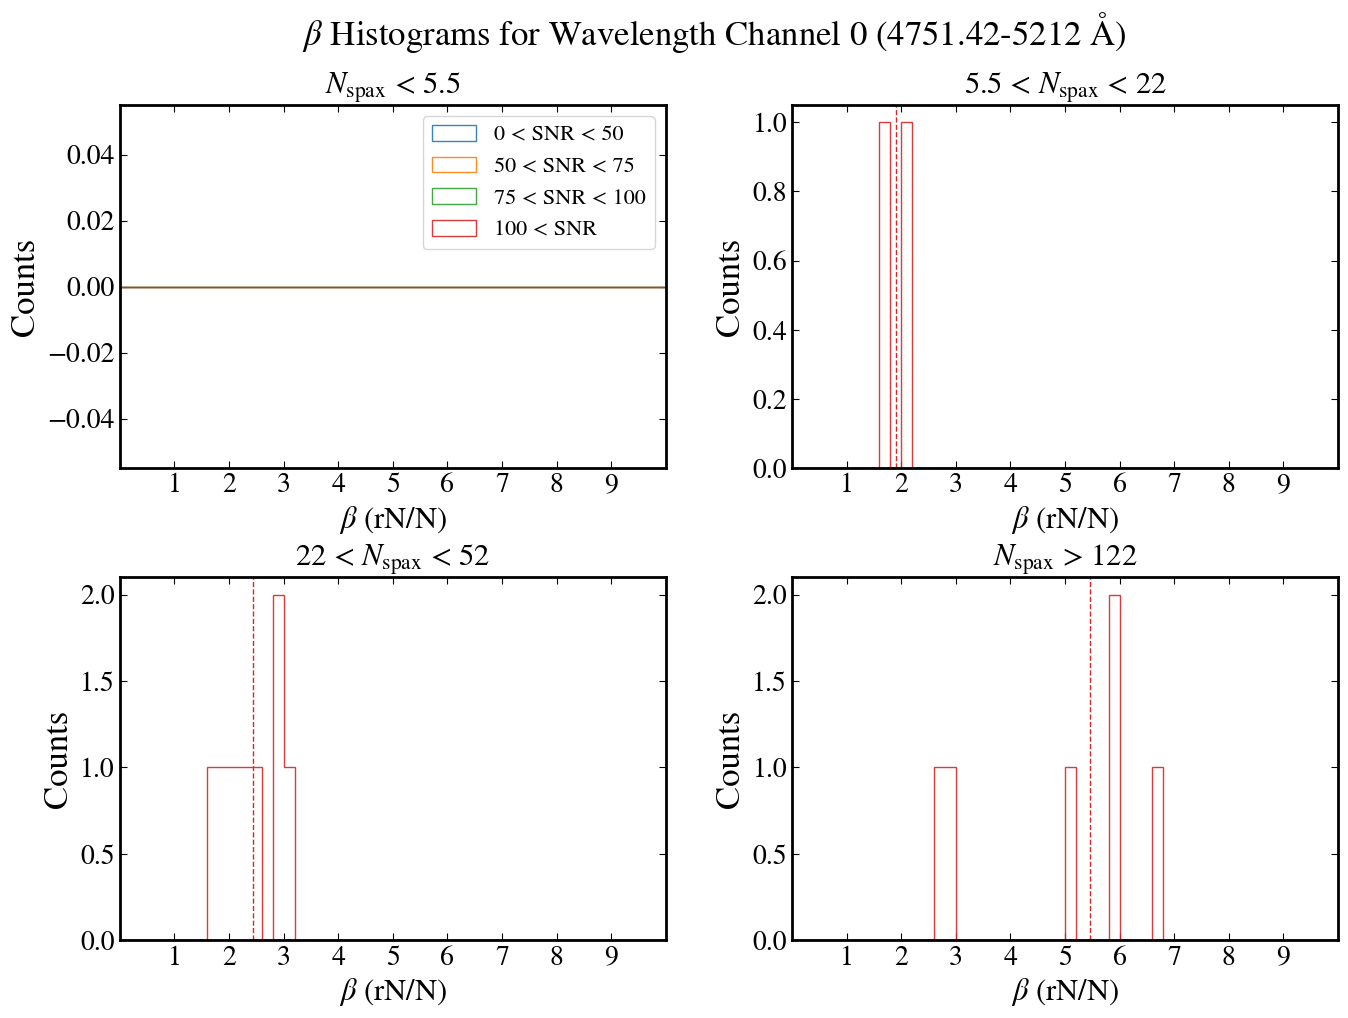

In [19]:
cube.mk_hist_plot(wv_channel=0,show_plot=True,save_plot=False)

In [20]:
cube.mk_hist_plots(show_plots=False,save_plots=True)

INFO:root:Saving beta_hist_4751.42_5212.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.0/beta_plots/beta_histogram_plots
INFO:root:Not displaying plot!
INFO:root:Saving beta_hist_5212_5672.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.0/beta_plots/beta_histogram_plots
INFO:root:Not displaying plot!
INFO:root:Saving beta_hist_5672_6132.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.0/beta_plots/beta_histogram_plots
INFO:root:Not displaying plot!
INFO:root:Saving beta_hist_6132_6592.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.0/beta_plots/beta_histogram_plots
INFO:root:Not displaying plot!
INFO:root:Saving beta_hist_6592_7052.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.0/beta_plots/beta_histogram_plots
INFO:root:Not displaying plot!
INFO:root:Saving beta_hist_7052_7513.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.

In [21]:
cube.create_beta_tables()

INFO:root:Writing beta_corr_4751.42_5212.dat to /Users/erickaguirre/Desktop/mangadap_muse/mangadap/data/beta_tables/test_cube
INFO:root:Writing beta_corr_5212_5672.dat to /Users/erickaguirre/Desktop/mangadap_muse/mangadap/data/beta_tables/test_cube
INFO:root:Writing beta_corr_5672_6132.dat to /Users/erickaguirre/Desktop/mangadap_muse/mangadap/data/beta_tables/test_cube
INFO:root:Writing beta_corr_6132_6592.dat to /Users/erickaguirre/Desktop/mangadap_muse/mangadap/data/beta_tables/test_cube
INFO:root:Writing beta_corr_6592_7052.dat to /Users/erickaguirre/Desktop/mangadap_muse/mangadap/data/beta_tables/test_cube
INFO:root:Writing beta_corr_7052_7513.dat to /Users/erickaguirre/Desktop/mangadap_muse/mangadap/data/beta_tables/test_cube
INFO:root:Writing beta_corr_7513_7973.dat to /Users/erickaguirre/Desktop/mangadap_muse/mangadap/data/beta_tables/test_cube
INFO:root:Writing beta_corr_7973_8433.dat to /Users/erickaguirre/Desktop/mangadap_muse/mangadap/data/beta_tables/test_cube
INFO:root:Wri

INFO:root:No beta distributions for S/N range between 0-50
INFO:root:No beta distributions for S/N range between 50-75
INFO:root:No beta distributions for S/N range between 75-100


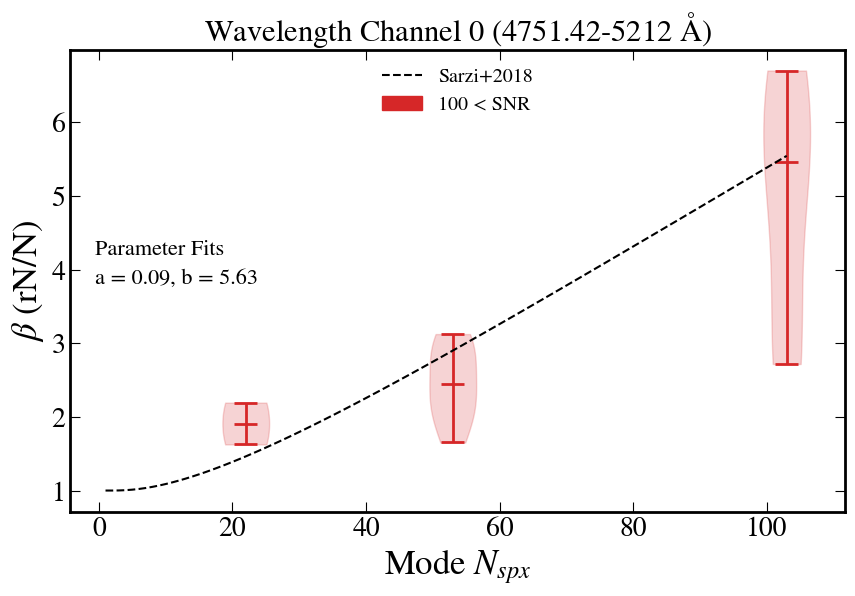

In [22]:
cube.mk_violin_plot(wv_channel=0,show_plot=True,save_plot=False)

In [23]:
cube.mk_violin_plots(show_plots=False,save_plots=True)

INFO:root:No beta distributions for S/N range between 0-50
INFO:root:No beta distributions for S/N range between 50-75
INFO:root:No beta distributions for S/N range between 75-100
INFO:root:Saving beta_violin_4751.42_5212.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.0/beta_plots/beta_violin_plots
INFO:root:No beta distributions for S/N range between 0-50
INFO:root:No beta distributions for S/N range between 50-75
INFO:root:No beta distributions for S/N range between 75-100
INFO:root:Saving beta_violin_5212_5672.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.0/beta_plots/beta_violin_plots
INFO:root:No beta distributions for S/N range between 0-50
INFO:root:No beta distributions for S/N range between 50-75
INFO:root:No beta distributions for S/N range between 75-100
INFO:root:Saving beta_violin_5672_6132.png to /Users/erickaguirre/Desktop/mangadap_muse/outputs/test_cube-SQUARE2.0/beta_plots/beta_violin_plots
INFO:root:No beta dist

## 4. Create beta table files